In [3]:
# https://brian2.readthedocs.io/en/stable/resources/tutorials/2-intro-to-brian-synapses.html
from brian2 import *

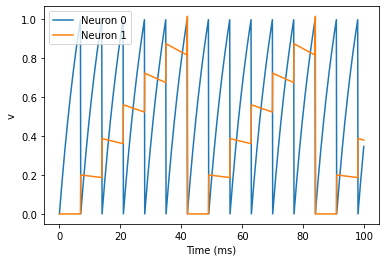

In [12]:
# Simple synapse
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(2, eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [2, 0] # Neuron 0 to have spikes on its own but neuron 1 none
G.tau = [10, 100]*ms # Neuron 0 to have 10 times as many spikes as neuron 1


# Comment the following 2 lines (no synapse) to verify neuron 1 has no spikes on its own
S = Synapses(G, on_pre='v_post += 0.2') # Neuron 1 potential to increase by 0.2 on each spike from neuron 0
S.connect(i=0, j=1) # Synapse from neuron 0 to 1

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend()

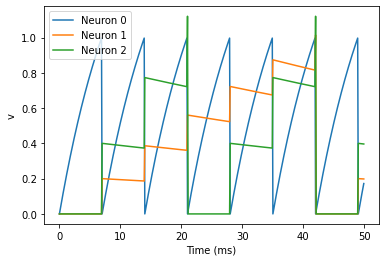

In [13]:
# Synapse weight
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(3, eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [2, 0, 0] # Neuron 0 to have spikes on its own but neuron 1 and 2 none
G.tau = [10, 100, 100]*ms # Neuron 0 to have 10 times as many spikes as neuron 1 and 2


# Comment the following 2 lines (no synapse) to verify neuron 1 and 2 have no spikes on their own
S = Synapses(G, model='w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2]) # Synapse from neuron 0 to 1 and 2
S.w = 'j*0.2' # Neuron 1 and 2 potentials to increase by 0.2 and 0.4 on each spike from neuron 0

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend()

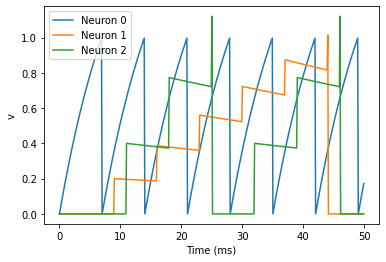

In [14]:
# Synapse delay
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(3, eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [2, 0, 0] # Neuron 0 to have spikes on its own but neuron 1 and 2 none
G.tau = [10, 100, 100]*ms # Neuron 0 to have 10 times as many spikes as neuron 1 and 2


# Comment the following 2 lines (no synapse) to verify neuron 1 and 2 have no spikes on their own
S = Synapses(G, model='w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2]) # Synapse from neuron 0 to 1 and 2
S.w = 'j*0.2' # Neuron 1 and 2 potentials to increase by 0.2 and 0.4 on each spike from neuron 0
S.delay = 'j*2*ms' # Delay of 0.2 for synapse from neuron 0 to 1, and 0.4 from 0 to 2

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend()

In [15]:
# Complex connectivity
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')
S = Synapses(G)
S.connect(condition='i!=j', p=0.2) # Connect all pairs of neurons with a probability of 0.2
len(S.source)

def visualize_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10) # Vertical line of circles for source neurons
    plot(ones(Nt), arange(Nt), 'ok', ms=10) # Vertical line of circles for target neurons
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k') # Line for a synapse from neuron i to neuron j
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    
    subplot(122)
    plot(S.i, S.j, 'ok') # Synapse from neuron i to neuron j
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualize_connectivity(S)

In [1]:
# Connections with different probabilities
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

for p in [0.1, 0.5, 1.0]:
    S = Synapses(G)
    S.connect(condition='i!=j', p=p)
    visualize_connectivity(S)
    suptitle('p = ' + str(p))

NameError: name 'start_scope' is not defined

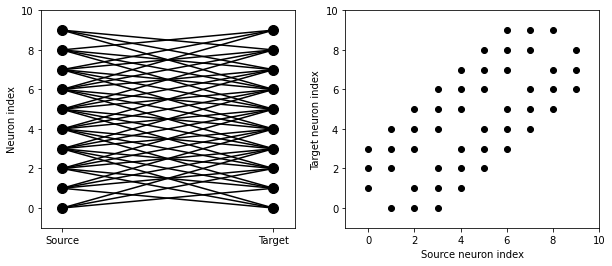

In [7]:
# Connections between neighbours
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G)
S.connect(condition='abs(i-j)<4 and i!=j')
visualize_connectivity(S)

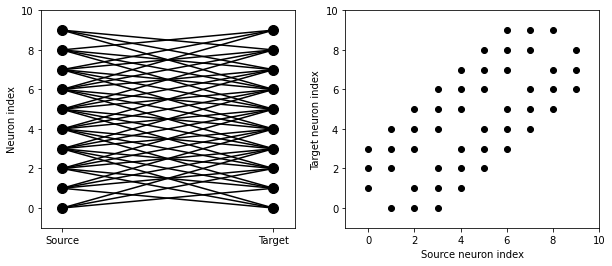

In [8]:
# Skipping in valid combinations
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G)
S.connect(j='k for k in range(i-3, i+4) if i!=k', skip_if_invalid=True)
visualize_connectivity(S)

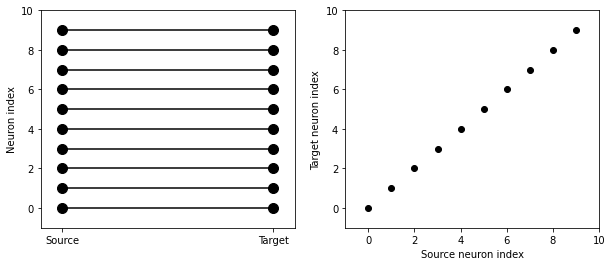

In [9]:
# One to one connections
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G)
S.connect(j='i')
visualize_connectivity(S)

Text(0, 0.5, 'Target neuron position (um)')

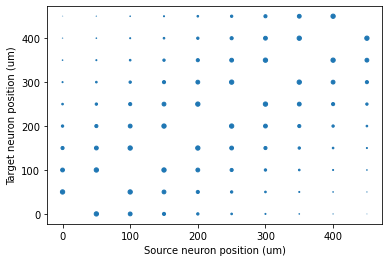

In [10]:
# Distance-dependent connectivity
start_scope()

N = 10 # 30
neuron_spacing = 50*umetre
width = N/4.0*neuron_spacing

G = NeuronGroup(N, 'x : metre')
G.x = 'i*neuron_spacing' # Neuron position

S = Synapses(G, model='w : 1')
S.connect(condition='i!=j') # Each neuron connected to all other neurons
S.w = 'exp(-(x_pre - x_post)**2 / (2*width**2))' # Synapse weight deceases with distance

scatter(S.x_pre/um, S.x_post/um, S.w*20)
xlabel('Source neuron position (um)')
ylabel('Target neuron position (um)')

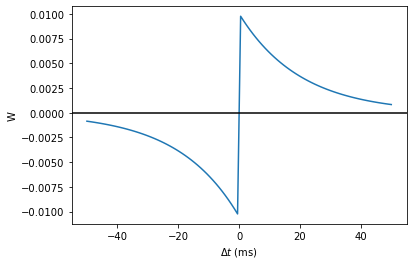

In [23]:
# Spike-timing dependent plasticity (STDP)

# https://en.wikipedia.org/wiki/Spike-timing-dependent_plasticity
# If an input spike to a neuron tends, on average, to occur immediately before that neuron's output spike, then that particular input is made somewhat stronger.
# If an input spike tends, on average, to occur immediately after an output spike, then that particular input is made somewhat weaker.

# Δw = ∑tpre ∑tpost W(tpost−tpre)
# Δt = tpost − tpre
# Change in synaptic weight: the longer the time difference, the lower the weight
# W(Δt) = A_pre*exp(−Δt/tau_pre) if Δt>0 or A_post*exp(Δt/tau_post) if Δt<0

start_scope()

tau_pre = tau_post = 20*ms
A_pre = 0.01
A_post = -A_pre*1.05
delta_t = linspace(-50, 50, 100)*ms
W = where(delta_t>0, A_pre*exp(-delta_t/tau_pre), A_post*exp(delta_t/tau_post))
plot(delta_t/ms, W)
xlabel(r'$\Delta t$ (ms)')
ylabel('W')
axhline(0, ls='-', c='k') # Horizontal black line

Text(0.5, 0, 'Time (ms)')

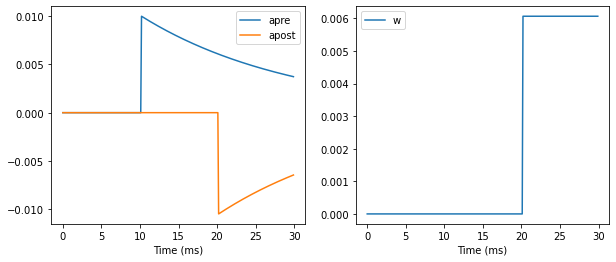

In [13]:
# Traces of pre and postsynaptic activity
start_scope()

taupre = taupost = 20*ms
wmax = 0.01
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05

G = NeuronGroup(2, 'v:1', threshold='t>(1+i)*10*ms', refractory=100*ms) # Neuron 0 fires a spike at 10 ms, neuron 1 at 20 ms
S = Synapses(G, 
    model='''
    w : 1
    dapre/dt = -apre/taupre : 1 (clock-driven)    # Traces of presynaptic activity
    dapost/dt = -apost/taupost : 1 (clock-driven) # Traces of postsynaptic activity
    ''',                                          # Use either event-driven or clock-driven
    on_pre='''
    apre += Apre               # Update the presynaptic trace
    w = clip(w+apost, 0, wmax) # Update and clamp the weight between 0 and wmax
    ''',                       # When a presynaptic spike occurs
    on_post='''
    apost += Apost             # Update the postsynaptic trace and weight
    w = clip(w+apre, 0, wmax)  # Update and clamp the weight between 0 and wmax
    ''',                       # When a postsynaptic spike occurs
    method='linear')
S.connect(i=0, j=1)
M = StateMonitor(S, ['w', 'apre', 'apost'], record=True)

run(30*ms)

figure(figsize=(10, 4))
subplot(121)
plot(M.t/ms, M.apre[0], label='apre')
plot(M.t/ms, M.apost[0], label='apost')
xlabel('Time (ms)')
legend()
subplot(122)
plot(M.t/ms, M.w[0], label='w')
legend(loc='best')
xlabel('Time (ms)')

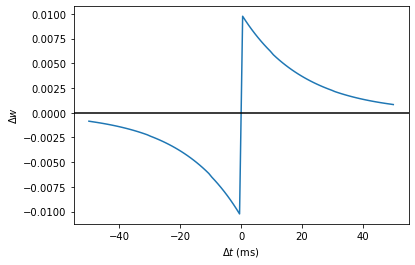

In [14]:
start_scope()

taupre = taupost = 20*ms
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05
tmax = 50*ms
N = 100

# Presynaptic neurons G spike at times from 0 to tmax
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*tmax/(N-1)'
# Postsynaptic neurons H spike at times from tmax to 0
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H.tspike = '(N-1-i)*tmax/(N-1)'
# So difference in spike times will vary from -tmax to +tmax

S = Synapses(G, H,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(j='i')

run(tmax+1*ms)

plot((H.tspike-G.tspike)/ms, S.w)
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')